In [60]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
%matplotlib inline

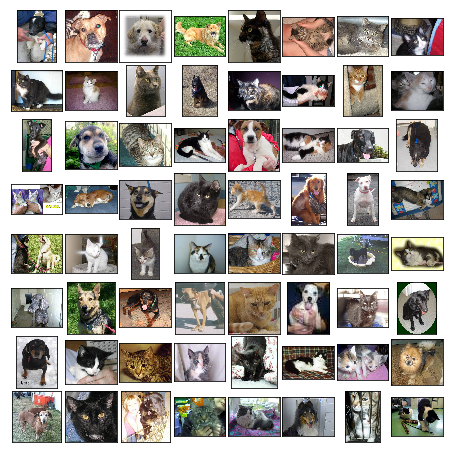

In [37]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(Image.open('data/test1/{}.jpg'.format(i+1)), cmap=plt.cm.bone, interpolation='nearest')
plt.show()#sthash.pmqQLelu.dpuf

In [38]:
from sklearn.decomposition import PCA

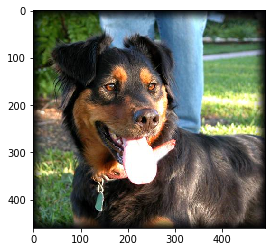

In [39]:
img = Image.open('data/test1/190.jpg')
plt.imshow(img)

In [45]:
img1 = np.asarray(img)
img1.shape

(460, 491, 3)

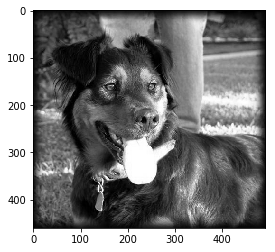

In [80]:
gray_img = Image.open('data/test1/190.jpg').convert('LA')
plt.imshow(gray_img)

In [189]:
img = Image.open('data/test1/190.jpg').convert("L")
imgarr = np.array(img) 
imgarr.shape

(460, 491)

In [224]:
import cv2
import glob

In [343]:
imagePaths = glob.glob("data/sample/*")
IMG_SIZE = 400
X = []
for img in imagePaths:
    img_data = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
    X.append([np.array(img_data)])

In [344]:
X_train = np.array([i[0] for i in X]).reshape(-1, IMG_SIZE, IMG_SIZE)

In [345]:
X_train = np.array([i.flatten() for i in X_train])

In [346]:
df = pd.DataFrame(X_train)
df.shape

(1001, 160000)

In [348]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,159990,159991,159992,159993,159994,159995,159996,159997,159998,159999
0,130,130,130,130,130,129,129,129,128,128,...,67,72,74,75,75,76,76,76,76,76
1,77,48,23,10,21,45,92,89,83,78,...,175,183,198,201,197,199,189,178,180,185
2,65,73,81,71,89,67,66,77,68,71,...,46,51,61,73,66,48,54,58,74,84
3,2,2,3,3,4,4,6,8,9,11,...,157,155,151,148,144,142,140,130,129,135
4,137,138,138,138,139,140,141,142,143,148,...,79,75,77,81,83,82,83,91,104,118


In [367]:
pca_img = PCA(0.9)
pca_img.fit(X_train)
gray_img_pca = pca_img.fit_transform(X_train)

In [368]:
gray_img_pca.shape

(1001, 182)

[ 0.20786658  0.32523649  0.3996665   0.4583149   0.49027964  0.51805053
  0.54217616  0.56120155  0.58014895  0.59521898  0.60872867  0.62083665
  0.63090682  0.64049721  0.64926139  0.65783564  0.66555389  0.67310104
  0.67979719  0.68637795  0.69207738  0.69759682  0.70268511  0.70771868
  0.7126217   0.71709335  0.72136809  0.72543848  0.72933483  0.73310428
  0.73684295  0.74035067  0.74372536  0.7469063   0.74992644  0.75292687
  0.75578317  0.75857375  0.76129883  0.76394691  0.766552    0.76899472
  0.77141251  0.77373967  0.77599319  0.77821483  0.78037846  0.78249691
  0.78453733  0.78657623  0.78854675  0.79041481  0.79223471  0.7940419
  0.79581758  0.79758503  0.79931772  0.8010168   0.80269221  0.80432138
  0.80591912  0.80749382  0.80903771  0.81056212  0.81204952  0.8134841
  0.81490808  0.81629827  0.81767543  0.81901524  0.82032698  0.82162373
  0.82289346  0.82414346  0.82537762  0.82658603  0.82778643  0.8289608
  0.83011489  0.83125905  0.83237489  0.83348252  0.83

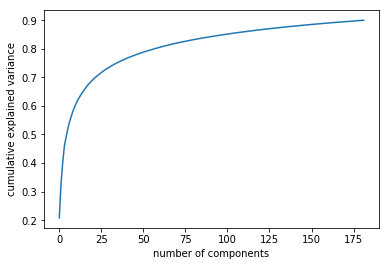

In [369]:
plt.plot(np.cumsum(pca_img.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca_img.explained_variance_ratio_))

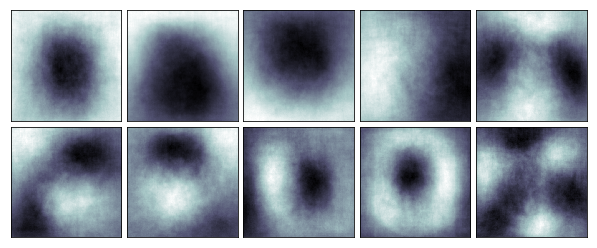

In [375]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_img.components_[i,:], (400,400)), cmap=plt.cm.bone, interpolation='nearest') 

In [379]:
X_inv_proj = pca_img.inverse_transform(gray_img_pca)

In [380]:
X_proj_img = np.reshape(X_inv_proj,(1001,400,400))

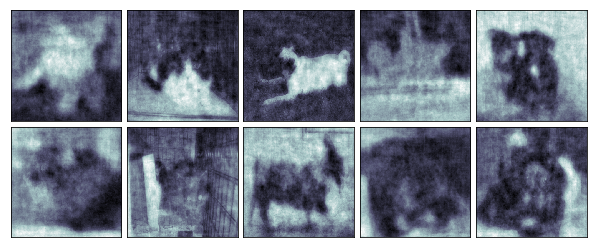

In [381]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')